In [45]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [71]:
#24)

#a) 50 puntos y pesos de Gauss
Roots, Weights = np.polynomial.legendre.leggauss(50)

#b) Definir la funcion
g_k = lambda x, y, z, r, phi: (z * r) / ((x**2 + y**2 + z**2 - 2*r*x*np.cos(phi) - 2*r*y*np.sin(phi))**(3/2))

#c) Doble cuadratura
def get_integral(Roots, Weights, x, y, z, R = 1.):
    k = 1.9429303960
    n = np.shape(Roots)[0]
    
    a = 0.
    b = 2*np.pi
    c = 0.
    d = R

    I = 0.
    
    for i in range(n):
        for j in range(n):
            I += -k*(((b-a)*(d-c))/4)*(Weights[i]*Weights[j]*g_k(x, y, z, 0.5*((Roots[j]*(d-c)) + c + d), 0.5*((Roots[i]*(b-a)) + a + b)))
    return I
    

In [72]:
#d) Campo gravitacional en el punto (0, 0, 0.2) 
p = (0., 0., 0.2)
g = get_integral(Roots, Weights, p[0], p[1], p[2])
print('Campo gravitacional en el punto ',p,': g = {} m/s^2'.format(g))

Campo gravitacional en el punto  (0.0, 0.0, 0.2) : g = -152.59739646274775 m/s^2


/var/folders/d3/l9212dl52rq4bd3hyqq1g_380000gn/T/ipykernel_33919/1950489046.py:7: RuntimeWarning: invalid value encountered in scalar power
  g_k = lambda x, y, z, r, phi: (z * r) / ((x**2 + y**2 + z**2 - 2*r*x*np.cos(phi) - 2*r*y*np.sin(phi))**(3/2))


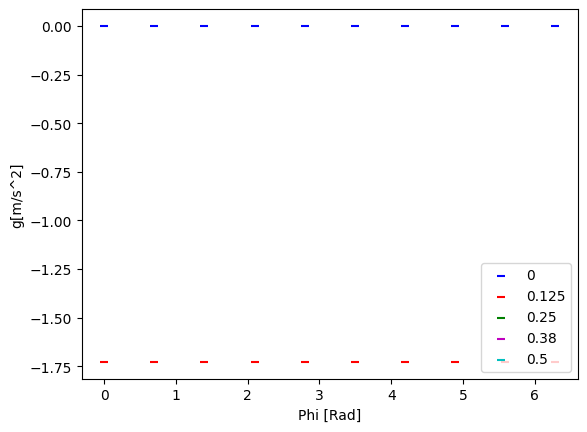

In [54]:
#e) Comportamiento azimutal del campo
x_polar = lambda r, phi: r*np.cos(phi)
y_polar = lambda r, phi: r*np.sin(phi)
phi = np.linspace(0., 2*np.pi, 10)
for R, c in zip([0., 0.125, 0.25, 0.38, 0.5], ['b', 'r', 'g', 'm', 'c']):
    plt.scatter(phi, [get_integral(Roots, Weights, x_polar(R, i), y_polar(R, i), 0.2, R) for i in phi], color = c, marker="_")
plt.xlabel("Phi [Rad]")
plt.ylabel("g[m/s^2]")
plt.legend([0, 0.125, 0.25, 0.38, 0.5], loc="lower right")
plt.show()

In [55]:
#(f) ¿Como interpreta que la gravedad no depende del angulo sobre la tierra?
#Dado a que se esta trabajando sobre el sistema de coordenadas polares, 
#eso quiere decir que la gravedad es radialmente simetrica pues para un R constante todos los puntos para cualquier phi con equidistantes al origen.

#(g) ¿Que valores tiene la gravedad en el ecuador R = 0.5 y en el borde R = 1?
print('Gravedad en R = 0.5: ', get_integral(Roots, Weights, x_polar(0.5, 0.), y_polar(0.5, 0.), 0.2, 0.5), 'm/s^2')
print('Gravedad en R = 1: ', get_integral(Roots, Weights, x_polar(1., 0.), y_polar(1., 0.), 0.2, 1.), 'm/s^2')

#(h) ¿Que podrıa decirle a un amig@ terraplanista con base a sus resultados teoricos?
# NO tiene sentido que la tierra sea plana pues la constante de la gravedad es mejor a medida que se aleja del polo. En ese sentido la gravedad en el ecuador seria mucho menor 
# y se sabe que eso no es cierto. Para demostrarlo experimentalmente, bastaria con pesarse a distintas distancias desde el polo norte y comparar los resultados.


Gravedad en R = 0.5:  nan m/s^2
Gravedad en R = 1:  nan m/s^2


/var/folders/d3/l9212dl52rq4bd3hyqq1g_380000gn/T/ipykernel_33919/1950489046.py:7: RuntimeWarning: invalid value encountered in scalar power
  g_k = lambda x, y, z, r, phi: (z * r) / ((x**2 + y**2 + z**2 - 2*r*x*np.cos(phi) - 2*r*y*np.sin(phi))**(3/2))


In [50]:
#27)
#a) Tupla de 8 ecuaciones:
F = (lambda w0, w1, w2, w3, x0, x1, x2, x3: w0 + w1 + w2 + w3 - 2.,\
     lambda w0, w1, w2, w3, x0, x1, x2, x3: (w0*x0) + (w1*x1) + (w2*x2) + (w3*x3),\
     lambda w0, w1, w2, w3, x0, x1, x2, x3: (w0*(x0**2)) + (w1*(x1**2)) + (w2*(x2**2)) + (w3*(x3**2)) - (2/3),\
     lambda w0, w1, w2, w3, x0, x1, x2, x3: (w0*(x0**3)) + (w1*(x1**3)) + (w2*(x2**3)) + (w3*(x3**3)),\
     lambda w0, w1, w2, w3, x0, x1, x2, x3: (w0*(x0**4)) + (w1*(x1**4)) + (w2*(x2**4)) + (w3*(x3**4)) - (2/5),\
     lambda w0, w1, w2, w3, x0, x1, x2, x3: (w0*(x0**5)) + (w1*(x1**5)) + (w2*(x2**5)) + (w3*(x3**5)),\
     lambda w0, w1, w2, w3, x0, x1, x2, x3: (w0*(x0**6)) + (w1*(x1**6)) + (w2*(x2**6)) + (w3*(x3**6)) - (2/7),\
     lambda w0, w1, w2, w3, x0, x1, x2, x3: (w0*(x0**7)) + (w1*(x1**7)) + (w2*(x2**7)) + (w3*(x3**7)))

#b) Funcion vectorial:
def GetF(F,r):

  n = r.shape[0]
  v = np.zeros(n)

  for i in range(n):
    v[i] = F[i](r[0],r[1],r[2],r[3],r[4],r[5],r[6],r[7])

  return v

#c) Jacobiano:
def GetJacobian(f,r,h=1e-3):

  n = r.shape[0]

  J = np.zeros((n,n))

  for i in range(n):
    for j in range(n):

      rf = r.copy()
      rb = r.copy()

      rf[j] = rf[j] + h
      rb[j] = rb[j] - h

      J[i,j] = (f[i](rf[0],rf[1],rf[2],rf[3],rf[4],rf[5],rf[6],rf[7]) - f[i](rb[0],rb[1],rb[2],rb[3],rb[4],rb[5],rb[6],rb[7]))/(2*h)

  return J

#d) Descenso de gradiente:
def Metric(G,r):
  return 0.5*np.linalg.norm(GetF(G,r))**2

def Minimizer(G, r, lr = 0.01, error = 0.001):

  metric = 1.
  it = 0

  while metric > error:

    J = GetJacobian(G,r).T
    V = GetF(G,r)

    r = r - lr*np.dot(J,V)

    metric = Metric(G,r)

    #e) Cuando la metrica sea menor a 0.005 ajuste la tasa a γ = 0.001 para tener una solucion mas precisa. 
    if metric < 0.005:
      lr = 0.001
    it += 1

  return r,it

r0 = np.random.uniform(-1., 1., size = 8)

In [51]:
M = Minimizer(F, r0)[0]

In [52]:
#f) Estimacion de la integral
W, R = M[0:4], M[4:8]
I = 0
for i in range(4):
    I += W[i]*np.cos(R[i])
print('f) Estimacion integral: ', I)

#g) Considerando que el problema en R8 puede contener un conjunto grande de minimos locales, 
# cada vez que se ejecuta el codigo, el descenso de gradiente lleva al vector a un minimo diferente al que se describe por el vector con los pesos y raices de Legendre.
# por lo que al generar la cuadratura, no se obtendra una estimacion igual de buena que si se usan los pesos y raices del polinomio. 
    

f) Estimacion integral:  1.6773093205615097
